# Executor
### Use to take measurements

In [5]:
import nidaqmx
from nidaqmx import Task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DAQ
from data_structures import experiment

# Live plots
import matplotlib
%matplotlib notebook
import IPython
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 40em; width:60em}</style>"))

# Electrochemical Impedance Spectroscopy

In [137]:
'''=========================USER INPUTS========================================'''
E_DC = 0.028 # DC potential in V
E_AC = 0.010 # AC perturbation in V
low_freq = 1 # Lower limit of frequencies to be measured in Hz

Rm = 1000 # Rm resistance in Ohms
Cm = 0 # Cm capacitance in Farads

<IPython.core.display.Javascript object>


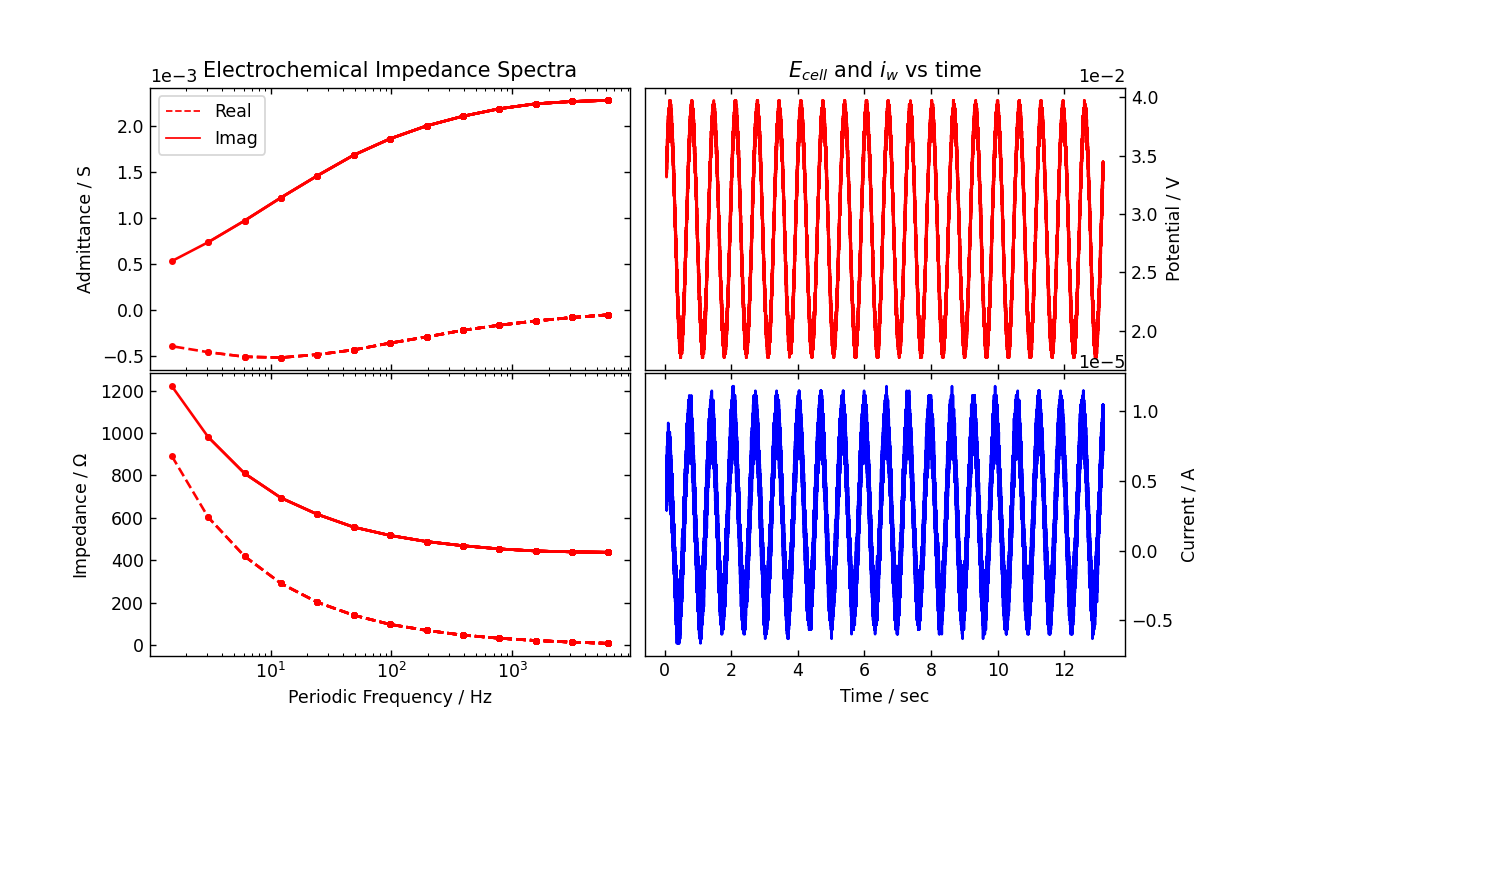

<IPython.core.display.Javascript object>


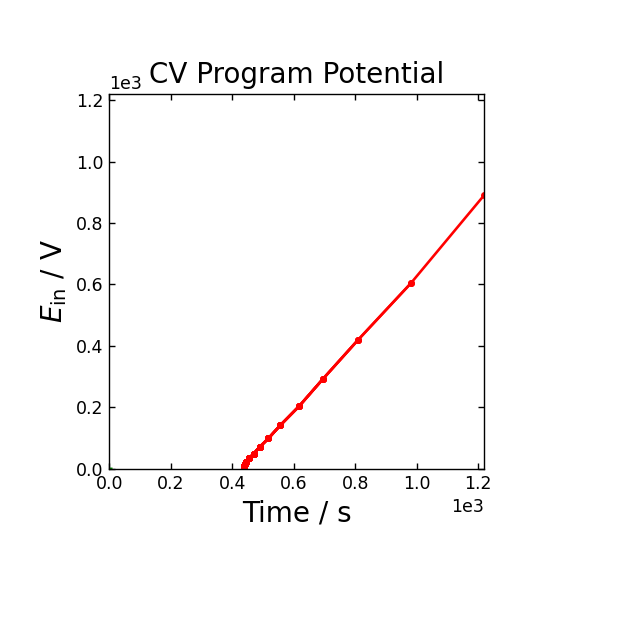

In [138]:
data_EIS, params_EIS, opt_EIS = DAQ.take_EIS(E_DC, E_AC, low_freq, Rm, Cm)
latest_EIS = experiment(data_EIS, params_EIS)

##### Save data

In [140]:
analyte = 'FcStar_'
electrode = 'GC_'
solvent = 'MeAc_'
notebook = 'P-09-07'
dirname = 'EIS_'+analyte+electrode+solvent+notebook
print(dirname)
latest_EIS.to_csv(dirname=dirname)

EIS_FcStar_GC_MeAc_P-09-07


# Cyclic Voltammetry

In [196]:
'''=========================USER INPUTS========================================'''
samp_rate = 3600 # sampling rate (samples/s) Use an integral multiple of 120/s and at least 3600 per volt
scan_rate = .4 # scan rate (V/s)
Rm = 1000 # Rm resistance in Ohms
Cm = 1.0e-6 # Cm capacitance in Farads
# buffer_size = 3600 # passed as a default argument, but changeable.

'''Set up potential profile'''
h_time = 2  # hold time before sweep in seconds
# potential bounds for each section
f_start_pot = 0 # Initial potential
f_end_pot = 0.2   # Vertex potential

pot_profile, samp_num_tot, scan_rate = DAQ.CV_potential_profile(f_start_pot, f_end_pot, samp_rate, scan_rate, h_time)

<IPython.core.display.Javascript object>


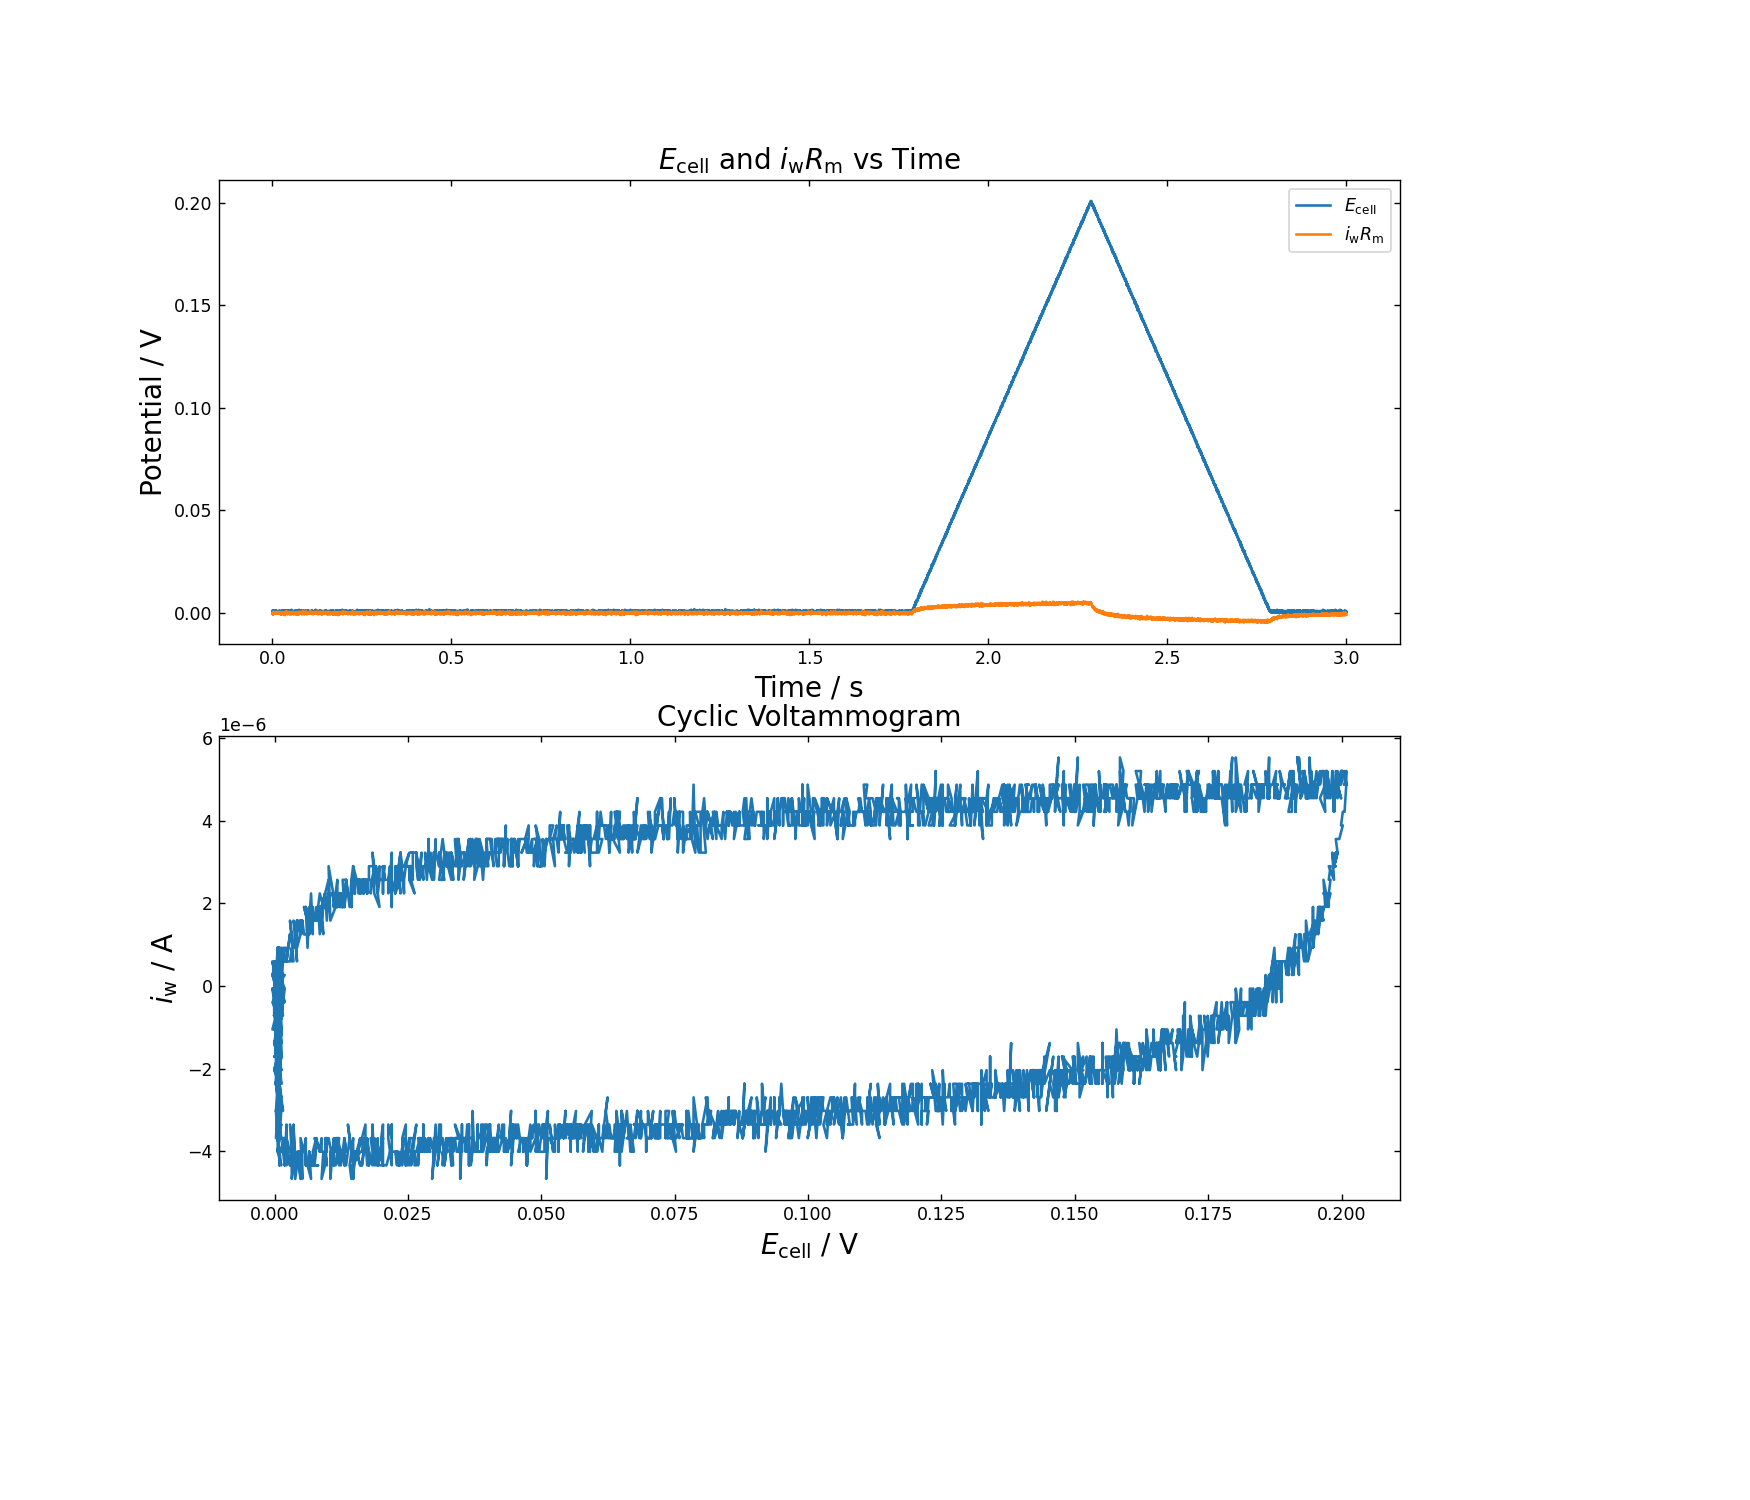

Must press Enter to end execution of code block


In [197]:
data_CV, params_CV = DAQ.take_CV(pot_profile, samp_num_tot, scan_rate, Rm, Cm)
latest_CV = experiment(data_CV, params_CV)

##### Save data

In [198]:
analyte = 'Fc_'
electrode = 'GC_'
solvent = 'MeAc_'
notebook = 'P-07-26'

dirname = 'CV_'+analyte+electrode+solvent+str(latest_CV.params.loc[latest_CV.params['parameter']=='scan_rate', 'value'].item()) + 'Vs-1_'+notebook
print(dirname)
latest_CV.to_csv(dirname=dirname)

CV_Fc_GC_MeAc_0.4Vs-1_P-07-26


# Potential Step Chronoamperometry

In [159]:
'''=========================USER INPUTS========================================'''
# samp_rate = 3600 # sampling rate (samples/s) Use an integral multiple of 120/s and at least 3600 per volt. Passed as default argument, but changable.
# buffer_size = 3600 # passed as a default argument, but changeable.
Rm = 1000 # Rm resistance in Ohms
Cm = 1.0e-6 # Cm capacitance in Farads

'''Set up potential profile'''
pot_init = -.4
pot_step = .8
pot_rest = -.4
pot_init_time = 1
pot_step_time = 4
pot_rest_time = 4

pot_profile, samp_num_tot = DAQ.CA_potential_profile(pot_init, pot_step, pot_rest,
                                                     pot_init_time, pot_step_time, pot_rest_time)

<IPython.core.display.Javascript object>


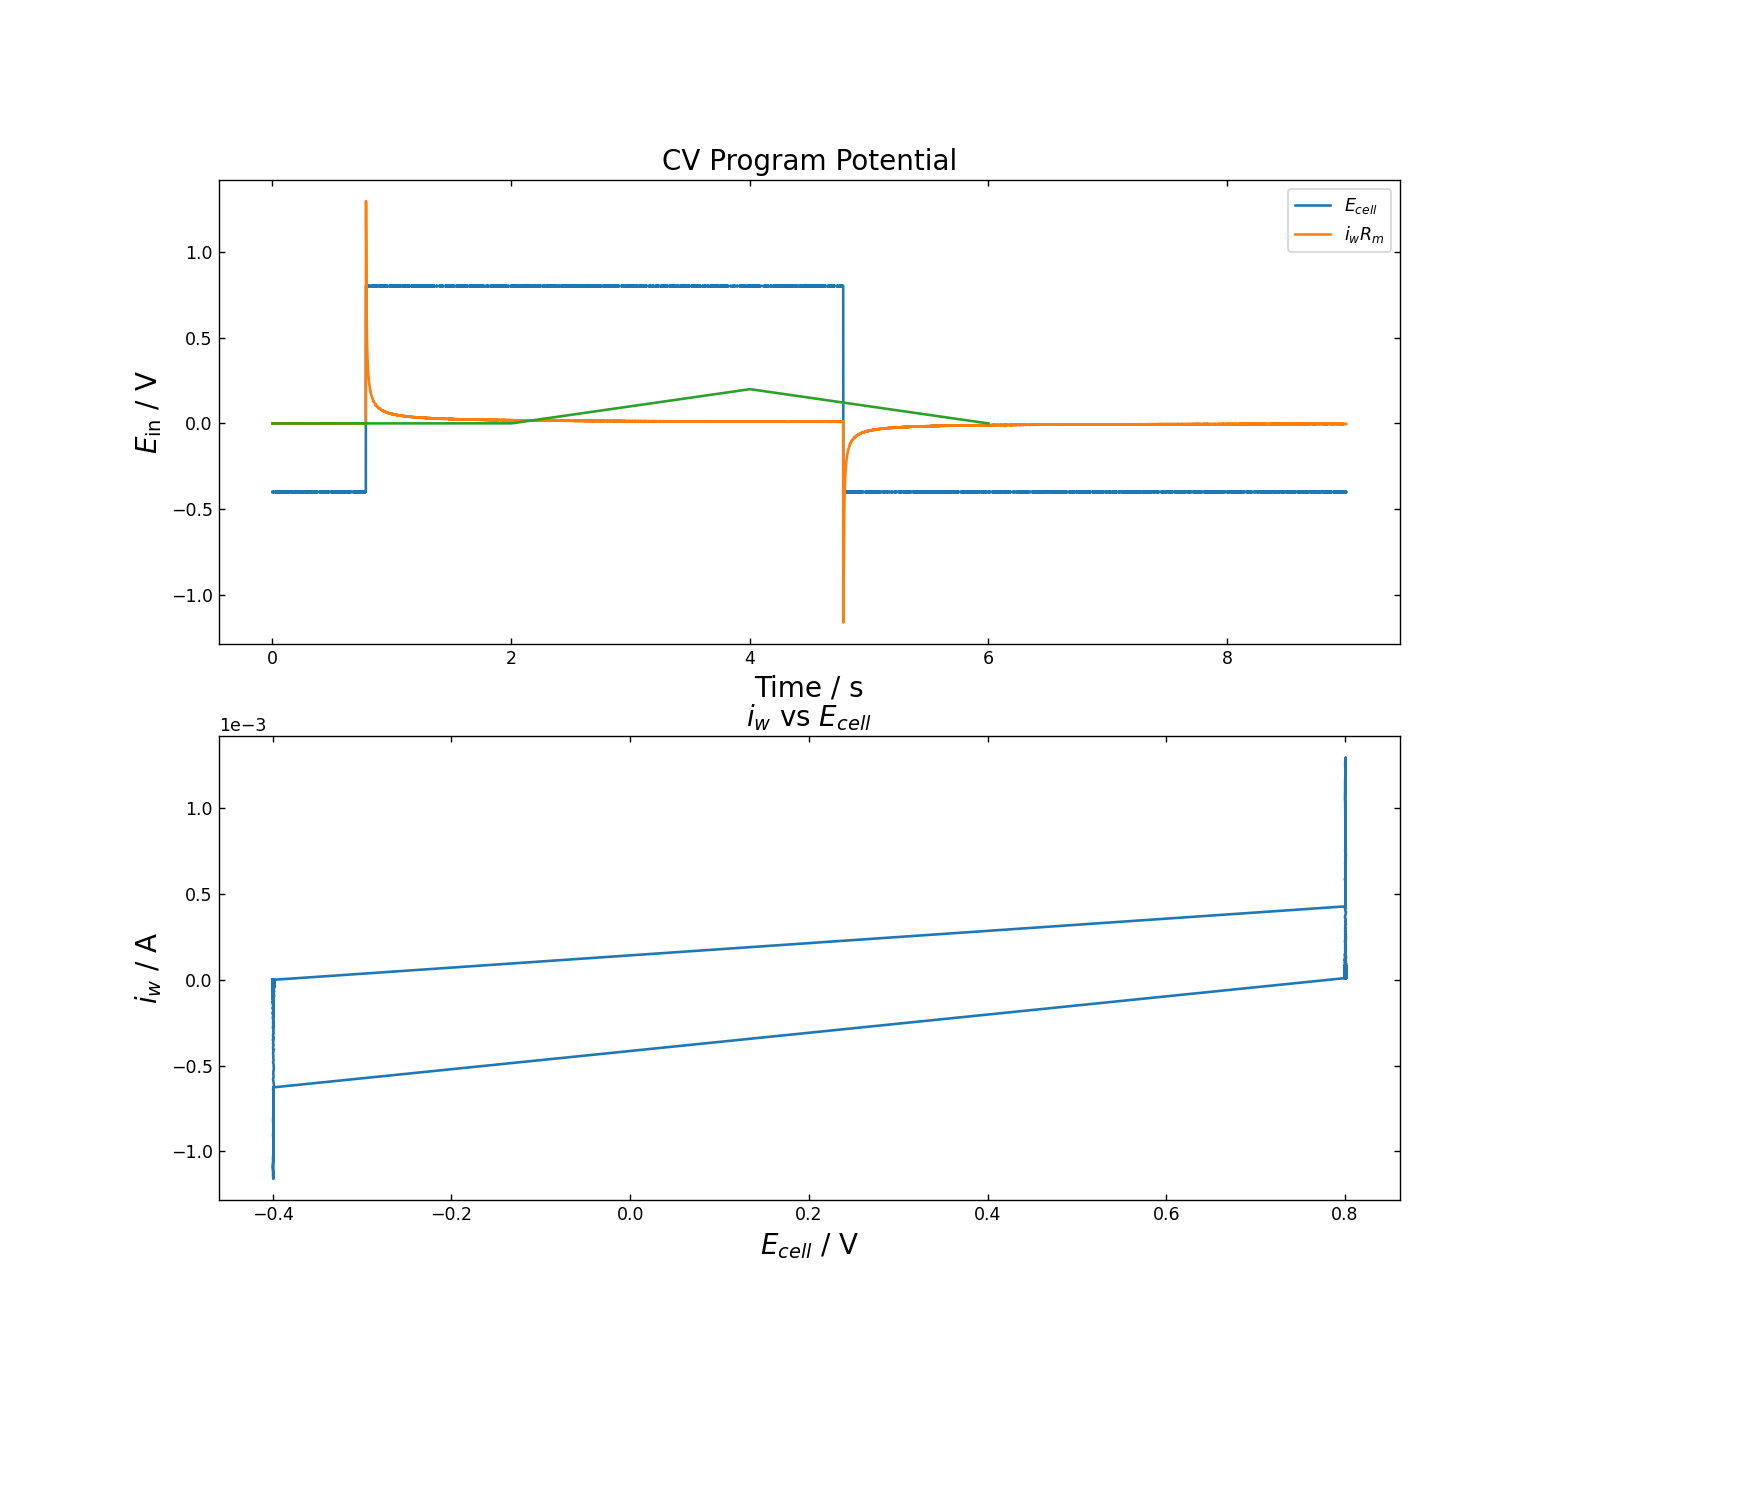

Must press Enter to end execution of code block


In [160]:
data_CA, params_CA = DAQ.take_CA(pot_profile, samp_num_tot, Rm, Cm)
latest_CA = experiment(data_CA, params_CA)

##### Save Data

In [161]:
analyte = 'FcStar_'
electrode = 'GC_'
solvent = 'MeAc_'
notebook = 'P-09-14'

dirname = 'CA_'+analyte+electrode+solvent+str(pot_init)+'V-'+str(pot_step)+'V_'+notebook
print(dirname)
latest_CA.to_csv(dirname=dirname)

CA_FcStar_GC_MeAc_-0.4V-0.8V_P-09-14
